In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [80]:
df = pd.read_json('data/Luxury_Beauty_5.json', lines=True)

In [81]:
# remove dupes starting at line 10947 to 12147
df.drop(df.index[10947:12148], axis=0, inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33077 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         33077 non-null  int64  
 1   verified        33077 non-null  bool   
 2   reviewTime      33077 non-null  object 
 3   reviewerID      33077 non-null  object 
 4   asin            33077 non-null  object 
 5   style           16841 non-null  object 
 6   reviewerName    33077 non-null  object 
 7   reviewText      33064 non-null  object 
 8   summary         33062 non-null  object 
 9   unixReviewTime  33077 non-null  int64  
 10  vote            5332 non-null   float64
 11  image           617 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.1+ MB


In [84]:
# change time from obj to datetime
# vote of review usefulness is abysmally low -- Only 19% of reviews have a helpfulness score

In [85]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
print(df['reviewTime'].min())
print(df['reviewTime'].max())
df.info()

2005-09-20 00:00:00
2018-09-24 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33077 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         33077 non-null  int64         
 1   verified        33077 non-null  bool          
 2   reviewTime      33077 non-null  datetime64[ns]
 3   reviewerID      33077 non-null  object        
 4   asin            33077 non-null  object        
 5   style           16841 non-null  object        
 6   reviewerName    33077 non-null  object        
 7   reviewText      33064 non-null  object        
 8   summary         33062 non-null  object        
 9   unixReviewTime  33077 non-null  int64         
 10  vote            5332 non-null   float64       
 11  image           617 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 3.1+ MB


In [86]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,2018-01-05,A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5,True,2017-04-05,A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5,True,2017-03-27,A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5,True,2017-03-20,A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5,True,2017-02-28,A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


### EDA
* count unique ASIN -- show num unique beauty items
* count unique reviewerID -- show num unique users
* time frame -- min and max
* distribution of ratings

In [61]:
# df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'],unit='s')
# df['unixReviewTime'] = df['unixReviewTime'].dt.year

In [87]:
df['asin'].value_counts()

B004N2S2JM    774
B003OGV7UO    774
B0013U0EYI    488
B0006PLMFQ    462
B000J4FGAG    459
             ... 
B00172IENU      1
B000X1LR6W      1
B001541W7K      1
B00172WFZI      1
B00B59LCIE      1
Name: asin, Length: 1581, dtype: int64

In [88]:
# how many asins have only 1 review ---> 19
(df['asin'].value_counts() == 1).value_counts()

False    1562
True       19
Name: asin, dtype: int64

In [89]:
df['reviewerID'].value_counts()

A2V5R832QCSOMX    97
AQY5XBYSENNZQ     96
A3091RP0SPZLMN    89
AHN86VFJIJ2JP     85
A2OW1FKQFPIA5D    80
                  ..
A2TCHXH4SIN2OF     4
A3NMQEQPT5LDIA     3
A2H6LHCM3AR3YV     3
A2V1MAUHH1YHKK     3
A3NQA378KXTZQM     3
Name: reviewerID, Length: 3819, dtype: int64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


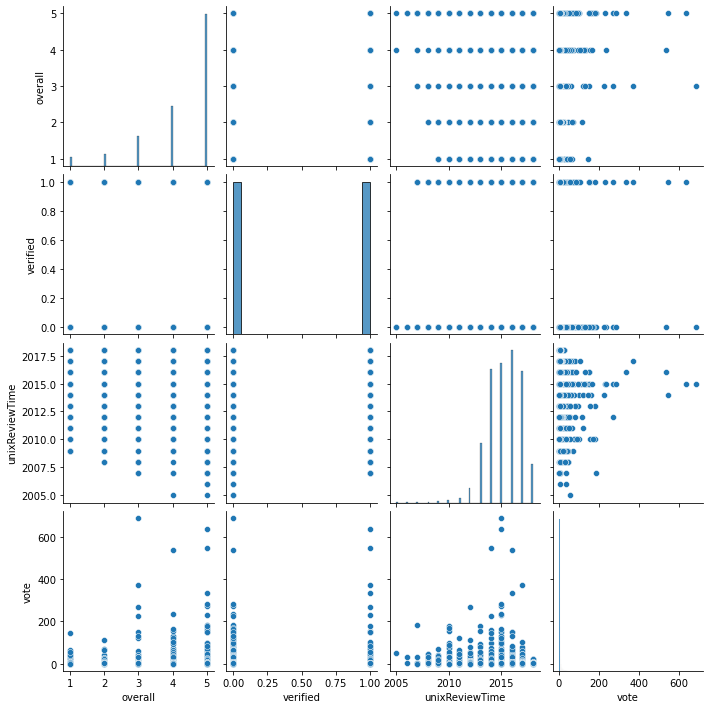

In [48]:
sns.pairplot(df)
#unixreviewtime converted to year

#is it possible to plot date? last cell throws error. i think it's bc of the dashes in dates

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


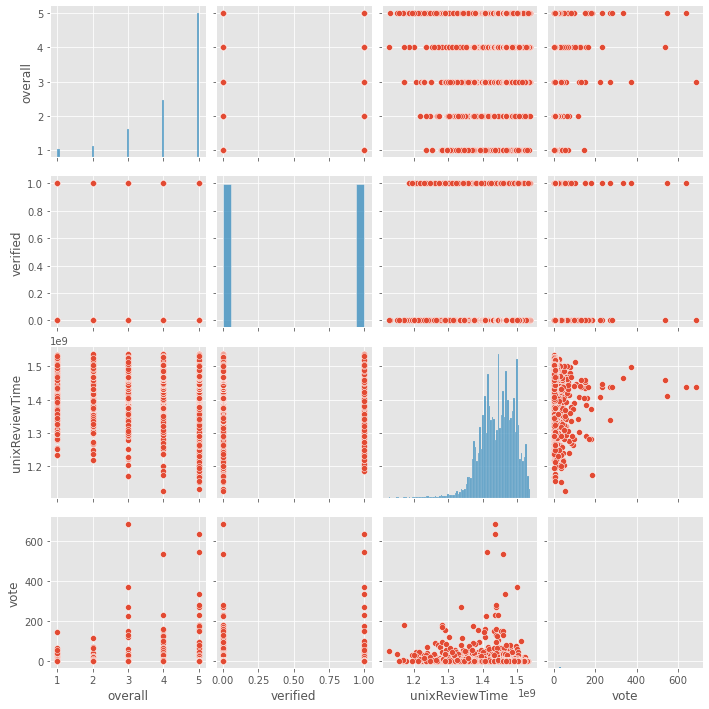

In [91]:
import seaborn as sns
sns.pairplot(df);
#unixreviewtime not converted

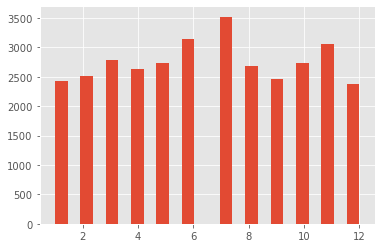

In [100]:
#frequency of reviews by month
plt.hist(pd.to_datetime(df['unixReviewTime'],unit='s').dt.month, bins=24);
# more beauty product reviews in the spring around March, summer around June and July, 
# and in the fall around black friday/thanksgiving in November

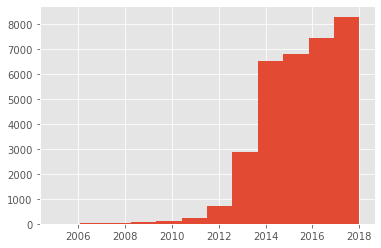

In [97]:
#frequency of reviews by year
plt.hist(pd.to_datetime(df['unixReviewTime'],unit='s').dt.year, bins=12);
# more reviews starting 2013 and beyond

In [109]:
grouped = df.groupby('overall')
grouped
# plt.plot(pd.to_datetime(df['unixReviewTime'],unit='s').dt.month, df['overall']);